In [12]:
import huracanpy
import matplotlib.pyplot as plt
import numpy as np

In [3]:
tracks = huracanpy.load("../TC_tracks/um_glm_n1280_GAL9.csv")

In [15]:
tracks["wind"] = tracks.wind.astype(np.float64)

(<Figure size 1000x1000 with 1 Axes>, <GeoAxes: xlabel='lon', ylabel='lat'>)

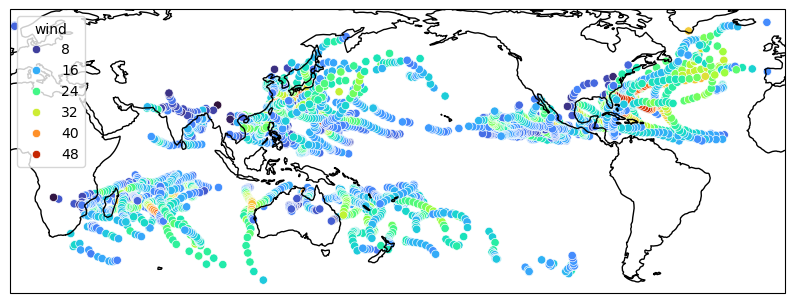

In [20]:
tracks.hrcn.plot_tracks(intensity_var_name = "wind",)